# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
data = pd.read_csv('loan-train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
print(len(data.Loan_ID.unique()))

614


In [4]:
# drop the Loan_ID column
data.drop(columns=['Loan_ID'], inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# get general info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Dealing with NON-numerical Values

In [6]:
object_columns = []

for i in data.columns:
    if data[i].dtype == 'object':
        object_columns.append(i)

print(object_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
# print the unique values for each object columns

print('############## Unique values for each object column ################')

for i in object_columns:
    print(i, '-->', data[i].unique())

print()
print('NOTE: we will dealing with missing values in only 4 columns [Gender, Married, Dependents, Self_Employed]')

############## Unique values for each object column ################
Gender --> ['Male' 'Female' nan]
Married --> ['No' 'Yes' nan]
Dependents --> ['0' '1' '2' '3+' nan]
Education --> ['Graduate' 'Not Graduate']
Self_Employed --> ['No' 'Yes' nan]
Property_Area --> ['Urban' 'Rural' 'Semiurban']
Loan_Status --> ['Y' 'N']

NOTE: we will dealing with missing values in only 4 columns [Gender, Married, Dependents, Self_Employed]


In [8]:
missing_values_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
missing_values_columns

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [9]:
print('############## missing values for the 4 columns ################')

count_missing_values = dict()
for i in missing_values_columns:
    print(i, '-->', data[i].isnull().sum())
    count_missing_values[i] = data[i].isnull().sum()
print()
print('NOTE: We can handle the missing values for these object columns by assign the mode to them')

############## missing values for the 4 columns ################
Gender --> 13
Married --> 3
Dependents --> 15
Self_Employed --> 32

NOTE: We can handle the missing values for these object columns by assign the mode to them


In [10]:
print(count_missing_values)

{'Gender': 13, 'Married': 3, 'Dependents': 15, 'Self_Employed': 32}


In [11]:
print('############## get the mode for the 4 columns ################')

column_mode = dict()

for i in missing_values_columns:
    mode = data[i].mode()[0]
    column_mode[i] = mode
    print(i, '-->', mode)


############## get the mode for the 4 columns ################
Gender --> Male
Married --> Yes
Dependents --> 0
Self_Employed --> No


In [12]:
print(column_mode)

{'Gender': 'Male', 'Married': 'Yes', 'Dependents': '0', 'Self_Employed': 'No'}


In [13]:
# function to calculate the percentage of unique values of each missing vlalue column
def column_values_percentage(data, column:str, unique_values:list):
    # count each unique value
    d = dict()
    for value in unique_values:
        d[value] = 0
    
    for key in d:
        for value in data[column]:
            if value == key:
                d[key] += 1
            elif value == key:
                d[key] += 1
    
    for key in d:
        print(f"Number of {key} = {d[key]}")
    
    
    # get the percentage for each unique value
    print(d)
    
    percentage_d = dict()
    for i in d:
        percentage_d[i] = round(d[i]/len(data),2) * 100
    
    return percentage_d

In [20]:
# Apply the funtion 
for column in missing_values_columns:
    print(f'--------------- column {column} -----------------------')
    percentage_d = column_values_percentage(data, column, data[column].unique()[:-1])
    total_percentage = 0
    for i in percentage_d:
        print(f'Percentage of {i} = {percentage_d[i]} %')
        total_percentage += percentage_d[i] 
    
    print(f'Total Percentage = {total_percentage} %')
    print(f'Percentage of missing values= {100-total_percentage} %')
    print(f'Number of missing values = {count_missing_values[column]}')
    print()
    
print('Conclusion: [Male = 80.0 %, Yes = 65.0 %, 0 = 56.0 %, No = 81.0 %]')
print('NOTE: All Percentages are above 50 % | So, We can fill the missing values of the categorical data with the mode values')


--------------- column Gender -----------------------
Number of Male = 489
Number of Female = 112
{'Male': 489, 'Female': 112}
Percentage of Male = 80.0 %
Percentage of Female = 18.0 %
Total Percentage = 98.0 %
Percentage of missing values= 2.0 %
Number of missing values = 13

--------------- column Married -----------------------
Number of No = 213
Number of Yes = 398
{'No': 213, 'Yes': 398}
Percentage of No = 35.0 %
Percentage of Yes = 65.0 %
Total Percentage = 100.0 %
Percentage of missing values= 0.0 %
Number of missing values = 3

--------------- column Dependents -----------------------
Number of 0 = 345
Number of 1 = 102
Number of 2 = 101
Number of 3+ = 51
{'0': 345, '1': 102, '2': 101, '3+': 51}
Percentage of 0 = 56.00000000000001 %
Percentage of 1 = 17.0 %
Percentage of 2 = 16.0 %
Percentage of 3+ = 8.0 %
Total Percentage = 97.0 %
Percentage of missing values= 3.0 %
Number of missing values = 15

--------------- column Self_Employed -----------------------
Number of No = 500
N

In [15]:
# filling the missing values of the categorical data with the model values
data_preparation = data.copy()
for i in missing_values_columns:
    data_preparation[i].replace(np.nan, column_mode[i], inplace=True)

In [21]:
data_preparation

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
# after dealing with missing values --> calculate the percentage of unique values for each missing value column
for column in missing_values_columns:
    print(f'--------------- column {column} -----------------------')
    percentage_d = column_values_percentage(data_preparation, column, data_preparation[column].unique())
    total_percentage = 0
    
    for i in percentage_d:
        print(f'Percentage of {i} = {percentage_d[i]} %')
        total_percentage += percentage_d[i] 
    
    print(f'Total Percentage = {total_percentage} %')
    print(f'Percentage of missing values= {100-total_percentage} %')
    print()
    


--------------- column Gender -----------------------
Number of Male = 502
Number of Female = 112
{'Male': 502, 'Female': 112}
Percentage of Male = 82.0 %
Percentage of Female = 18.0 %
Total Percentage = 100.0 %
Percentage of missing values= 0.0 %

--------------- column Married -----------------------
Number of No = 213
Number of Yes = 401
{'No': 213, 'Yes': 401}
Percentage of No = 35.0 %
Percentage of Yes = 65.0 %
Total Percentage = 100.0 %
Percentage of missing values= 0.0 %

--------------- column Dependents -----------------------
Number of 0 = 360
Number of 1 = 102
Number of 2 = 101
Number of 3+ = 51
{'0': 360, '1': 102, '2': 101, '3+': 51}
Percentage of 0 = 59.0 %
Percentage of 1 = 17.0 %
Percentage of 2 = 16.0 %
Percentage of 3+ = 8.0 %
Total Percentage = 100.0 %
Percentage of missing values= 0.0 %

--------------- column Self_Employed -----------------------
Number of No = 532
Number of Yes = 82
{'No': 532, 'Yes': 82}
Percentage of No = 87.0 %
Percentage of Yes = 13.0 %
Total 

In [25]:
for i in missing_values_columns:
    print(f'Unique values of column {i} = {data_preparation[i].unique()}')

Unique values of column Gender = ['Male' 'Female']
Unique values of column Married = ['No' 'Yes']
Unique values of column Dependents = ['0' '1' '2' '3+']
Unique values of column Self_Employed = ['No' 'Yes']


In [27]:
data_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Dealing with numerical data

In [26]:
data_preparation

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
numerical_columns = ['ApplicantIncome',  'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [31]:
for i in numerical_columns:
    print(f'number of missing values in {i} = {data_preparation[i].isnull().sum()}')

number of missing values in ApplicantIncome = 0
number of missing values in CoapplicantIncome = 0
number of missing values in LoanAmount = 22
number of missing values in Loan_Amount_Term = 14
number of missing values in Credit_History = 50


In [32]:
numerical_missing_values_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
print(numerical_missing_values_columns)

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [62]:
# as we see there is a difference between mean and medain for each column --> there are outliers
# we will fill missing values using median to avoid mean outliers problems  
data_preparation.describe().iloc[[1,5],2:]

,LoanAmount,Loan_Amount_Term,Credit_History
mean,146.412162,342.0,0.842199
50%,128.000000,360.0,1.000000


In [168]:
data_preparation_2 = data_preparation.copy()
for i in numerical_missing_values_columns:
    column_median = data_preparation_2[i].median()
    data_preparation_2[i] = data_preparation_2[i].replace(np.nan, column_median) 

In [169]:
data_preparation_2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [170]:
data_preparation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [171]:
data_preparation_2.describe().iloc[[1,5],2:]

,LoanAmount,Loan_Amount_Term,Credit_History
mean,145.752443,342.410423,0.855049
50%,128.000000,360.000000,1.000000


In [172]:
data_preparation.describe().iloc[[1,5],2:]

,LoanAmount,Loan_Amount_Term,Credit_History
mean,146.412162,342.0,0.842199
50%,128.000000,360.0,1.000000


In [173]:
# count value 0 in each numerical column
for i in numerical_columns:
    print(f'------------------------ {i} ----------------------')
    print(f'number of 0 = {len(data_preparation_2[data_preparation_2[i] == 0.0])}')
    print(f'percentage of 0 = {round((len(data_preparation_2[data_preparation_2[i] == 0.0])/len(data_preparation_2))*100, 2)} %')

print('NOTE: All percentages are below 50 % | So, we can deal with normally')

------------------------ ApplicantIncome ----------------------
number of 0 = 0
percentage of 0 = 0.0 %
------------------------ CoapplicantIncome ----------------------
number of 0 = 273
percentage of 0 = 44.46 %
------------------------ LoanAmount ----------------------
number of 0 = 0
percentage of 0 = 0.0 %
------------------------ Loan_Amount_Term ----------------------
number of 0 = 0
percentage of 0 = 0.0 %
------------------------ Credit_History ----------------------
number of 0 = 89
percentage of 0 = 14.5 %
NOTE: All percentages are below 50 % | So, we can deal with normally


# Data Visualization 

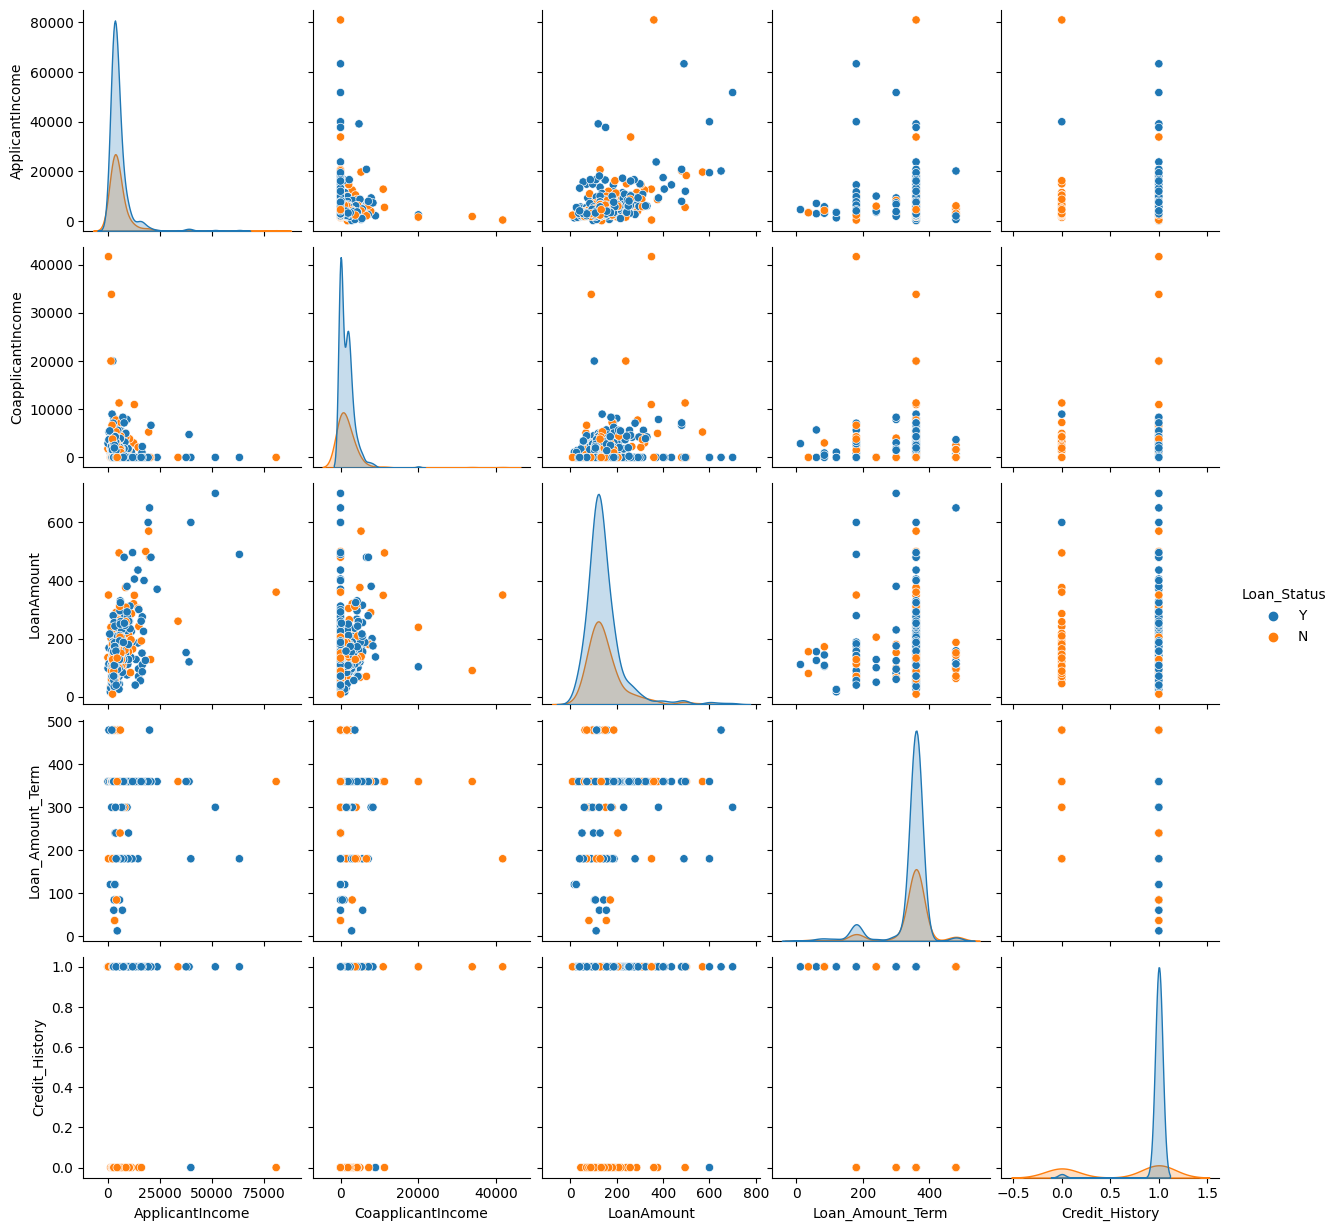

In [174]:
sns.pairplot(data_preparation_2, hue='Loan_Status')
plt.show()

ApplicantIncome


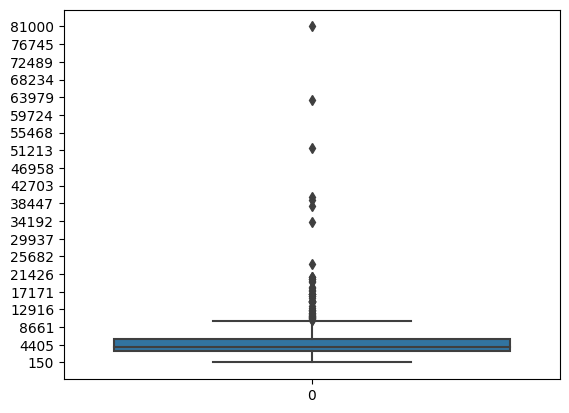

CoapplicantIncome


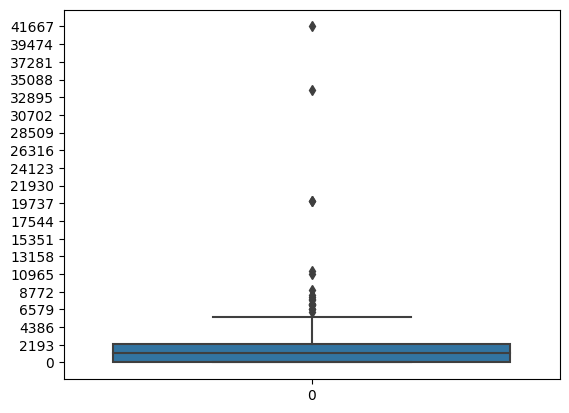

LoanAmount


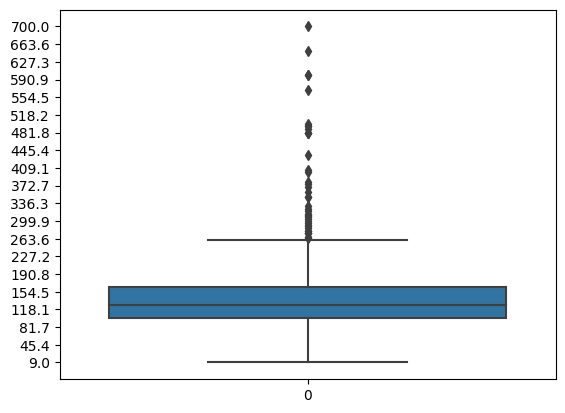

Loan_Amount_Term


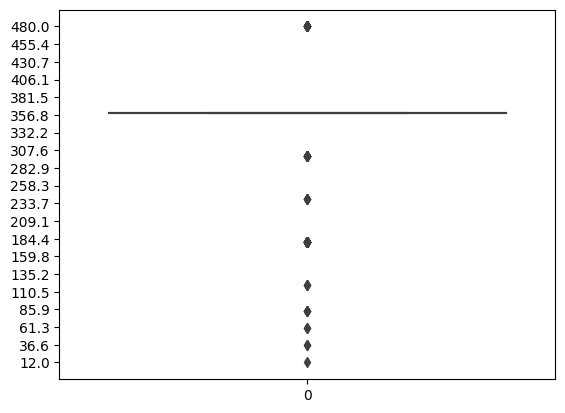

Credit_History


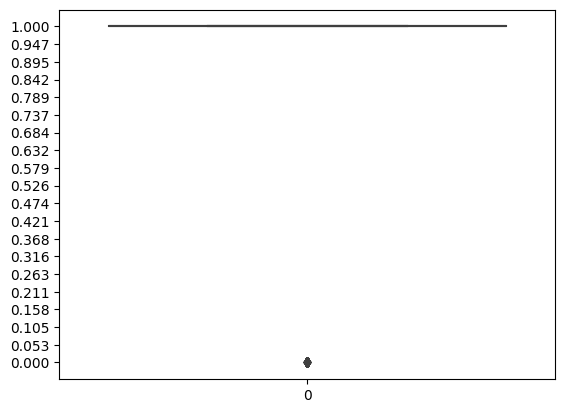

In [175]:
for i in numerical_columns:
    print(i)
    sns.boxplot(data=data_preparation_2[i])
    # Adjusting the number of ticks on the y-axis
    y_min, y_max = data_preparation_2[i].min(), data_preparation_2[i].max()
    plt.yticks(np.linspace(y_min, y_max, num=20))  # You can adjust the 'num' parameter to set the number of ticks
    plt.show()

In [176]:
print(data_preparation_2['Loan_Amount_Term'].unique())

[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]


In [177]:
print(data_preparation_2['Credit_History'].unique())

[1. 0.]


In [178]:
# deal with the outliers from [ ApplicantIncome, CoapplicantIncome, LoanAmount]

for i in data_preparation_2['ApplicantIncome']:
    if i > 11000:
        data_preparation_2['ApplicantIncome'].replace(i, 11000, inplace=True)


In [179]:
for i in data_preparation_2['CoapplicantIncome']:
    if i > 6000:
        data_preparation_2['CoapplicantIncome'].replace(i, 6000, inplace=True)

In [180]:
for i in data_preparation_2['LoanAmount']:
    if i > 270:
        data_preparation_2['LoanAmount'].replace(i, 270, inplace=True)

ApplicantIncome


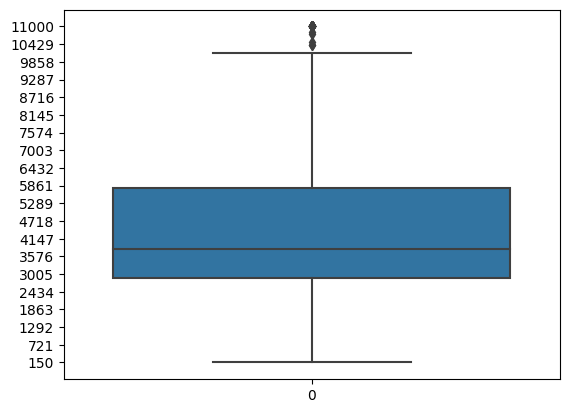

CoapplicantIncome


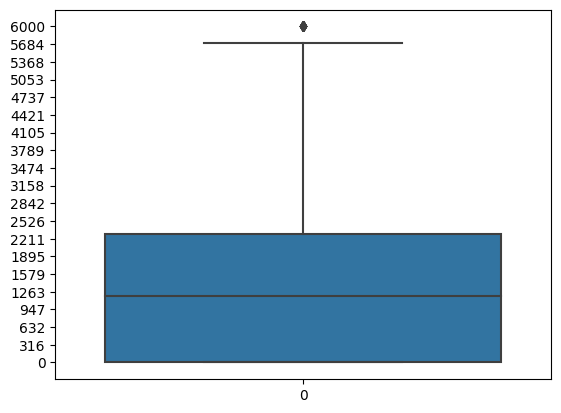

LoanAmount


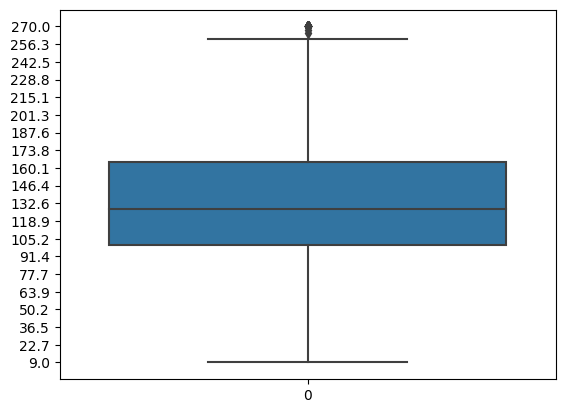

Loan_Amount_Term


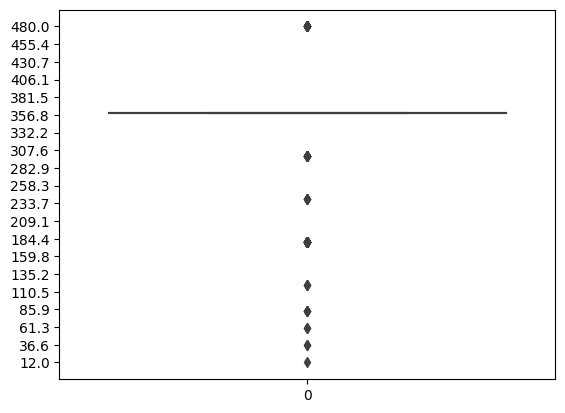

Credit_History


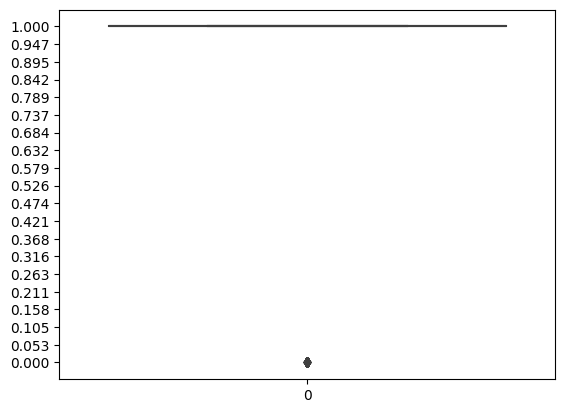

In [181]:
for i in numerical_columns:
    print(i)
    sns.boxplot(data=data_preparation_2[i])
    # Adjusting the number of ticks on the y-axis
    y_min, y_max = data_preparation_2[i].min(), data_preparation_2[i].max()
    plt.yticks(np.linspace(y_min, y_max, num=20))  # You can adjust the 'num' parameter to set the number of ticks
    plt.show()

# Data Preprocessing 

In [182]:
data_preparation_2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [183]:
data_preparation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [188]:
for i in object_columns:
    print(f'------------------------- {i} ----------------------')
    print(data_preparation_2[i].unique())
print()
print('NOTE: We can apply label encoder on all of them')

------------------------- Gender ----------------------
['Male' 'Female']
------------------------- Married ----------------------
['No' 'Yes']
------------------------- Dependents ----------------------
['0' '1' '2' '3+']
------------------------- Education ----------------------
['Graduate' 'Not Graduate']
------------------------- Self_Employed ----------------------
['No' 'Yes']
------------------------- Property_Area ----------------------
['Urban' 'Rural' 'Semiurban']
------------------------- Loan_Status ----------------------
['Y' 'N']

NOTE: We can apply label encoder on all of them


In [189]:
data_preprocessing = data_preparation_2.copy()

In [191]:
# apply label encoder
from sklearn.preprocessing import LabelEncoder
for i in object_columns:
    lb = LabelEncoder()
    data_preprocessing[i] = lb.fit_transform(data_preprocessing[i])

In [193]:
data_preprocessing

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [194]:
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


### Feature selection

<AxesSubplot:>

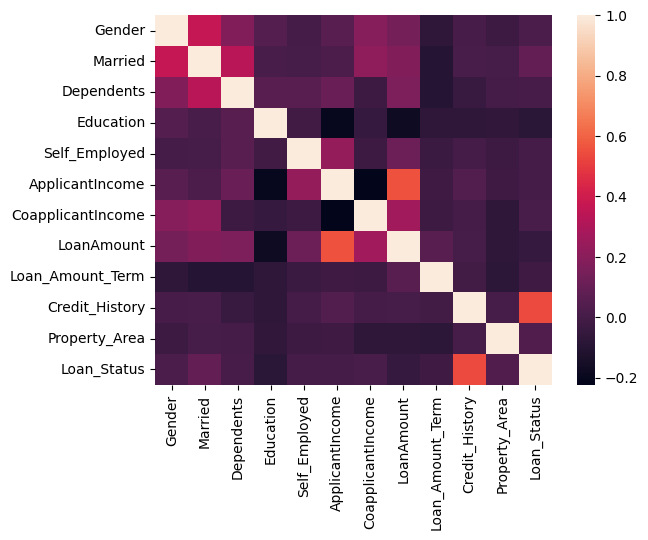

In [206]:
sns.heatmap(data_preprocessing.corr())

In [207]:
data_preprocessing.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.061856,0.190883,0.141707,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.023250,0.219122,0.175483,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.108687,-0.029451,0.166291,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.201983,-0.051077,-0.176852,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.234809,-0.031929,0.114125,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.061856,0.023250,0.108687,-0.201983,0.234809,1.000000,-0.224042,0.559029,-0.021763,0.035059,-0.023175,-0.001367
CoapplicantIncome,0.190883,0.219122,-0.029451,-0.051077,-0.031929,-0.224042,1.000000,0.266489,-0.030287,-0.001971,-0.072769,0.010532
LoanAmount,0.141707,0.175483,0.166291,-0.176852,0.114125,0.559029,0.266489,1.000000,0.062147,0.004781,-0.073948,-0.047729
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.021763,-0.030287,0.062147,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.035059,-0.001971,0.004781,-0.004705,1.000000,0.001963,0.540556


In [208]:
# remove less coorelated features -> ['Self_Employed', 'ApplicantIncome']
data_preprocessing.drop(columns=['Self_Employed', 'ApplicantIncome'], inplace=True)

In [209]:
data_preprocessing

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0.0,187.0,360.0,1.0,2,1


In [210]:
X = data_preprocessing.iloc[:,:-1]
Y = data_preprocessing.iloc[:,-1]

In [211]:
X.shape

(614, 9)

In [212]:
Y.shape

(614,)

### Data scaling

In [215]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [216]:
X_scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

### Data Spliting

In [217]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Model Building 

### In case of KNN

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

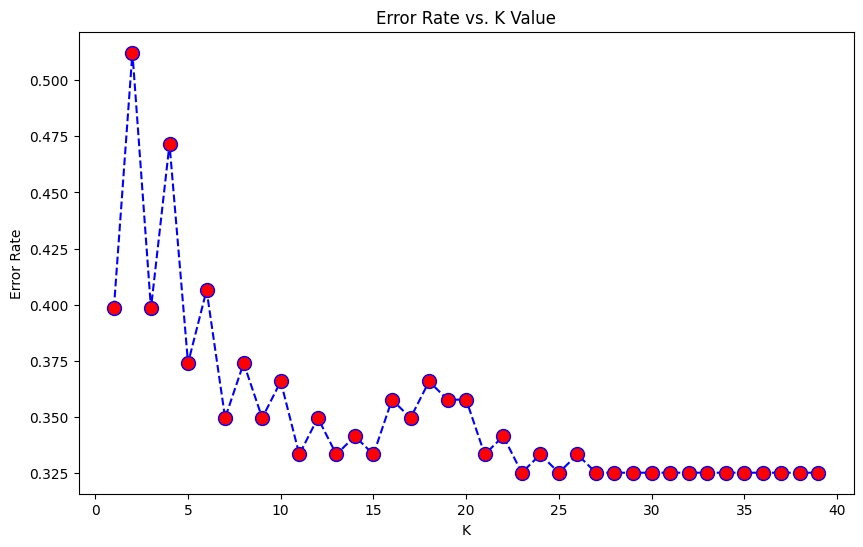

In [222]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [223]:
from sklearn.metrics import accuracy_score

In [224]:
accuracy_list = []
for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train, y_train)
    y_predict_i = knn_i.predict(x_test)  
    accuracy = accuracy_score(y_test, y_predict_i)
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

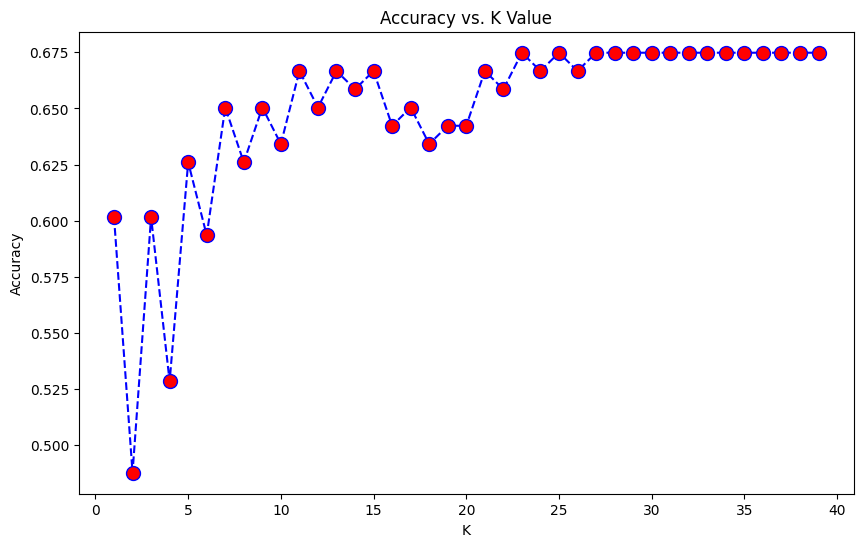

In [226]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### In case of logistic regression

In [227]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
logistic_y_predict = logistic_regression_model.predict(x_test)
logistic_y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [230]:
y_test.values

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [232]:
logistic_accuracy = accuracy_score(y_test, logistic_y_predict)
logistic_accuracy

0.7967479674796748